In [1]:
# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# READ data
df = pd.read_csv('./train.csv')

In [3]:
# Head of the data
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
# Basic analysis of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
# Describe the data 
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


#### Data Cleaning
- [ ] Outliers in Age,Person Income,person_emp_lenght,loan_percent_income,cb_person_cred_hist_length

In [6]:
# Check Missing values
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
# Data Cleaning

In [8]:
# Drop id columns since it is same as the index
df.drop(columns='id',inplace=True)

In [9]:
# Convert to binary values
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].eq('Y').astype(int)

In [10]:
# EDA

<Axes: ylabel='count'>

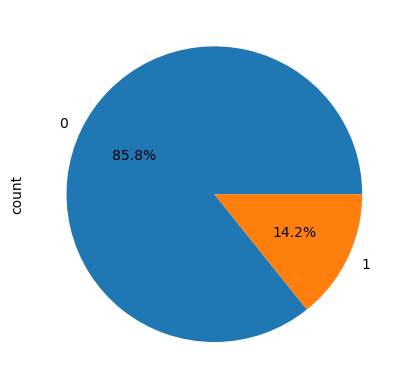

In [11]:
# Target Value Analysis
df['loan_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [12]:
# Univariate Analysis

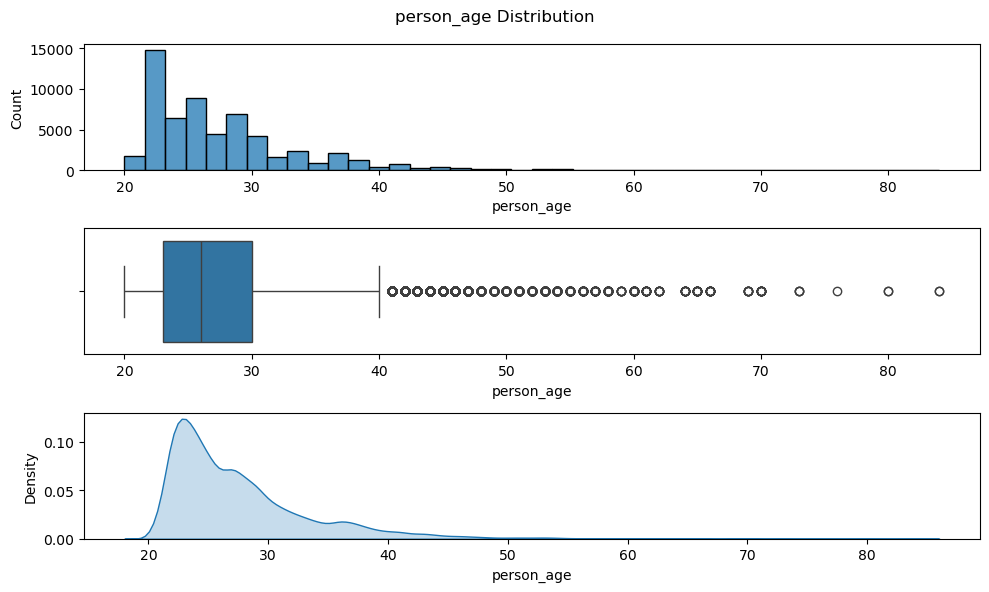

In [28]:
def num_plot(feature=''):
    plt.figure(figsize=(10,6))
    plt.suptitle(f'{feature} Distribution')
    plt.subplot(3,1,1)
    sns.histplot(df[feature],bins=40)
    plt.subplot(3,1,2)
    sns.boxplot(df[feature],orient='h')
    plt.subplot(3,1,3)
    sns.kdeplot(df[feature],fill=True)
    plt.tight_layout()
num_plot('person_age')

In [14]:
# dropping the dirty Outlier
age_outlier = df.query('person_age>90').index
df.drop(age_outlier,inplace=True)

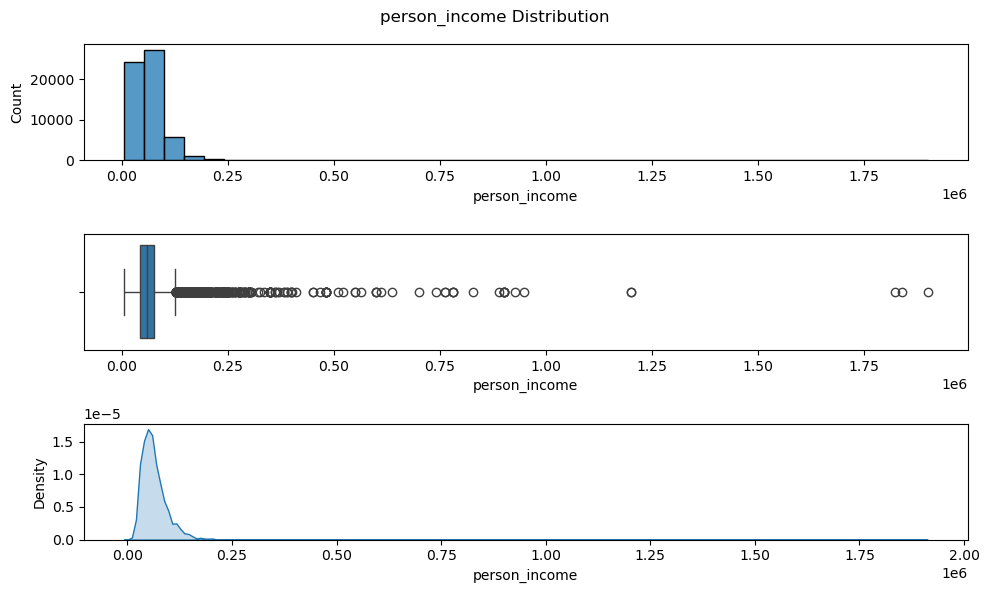

In [32]:
num_plot('person_income')

highly right skewed

<Axes: title={'center': 'Home_owner_ship count plot '}, xlabel='person_home_ownership'>

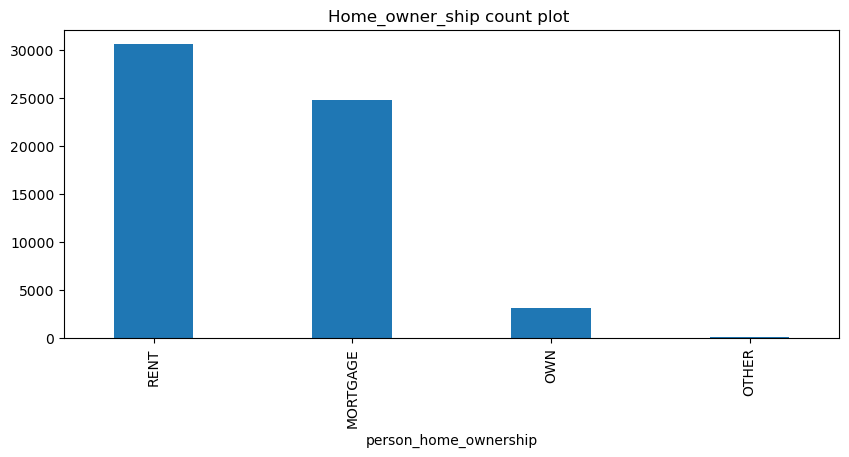

In [33]:
df['person_home_ownership'].value_counts().plot(kind='bar',figsize=(10,4),width=.4,title='Home_owner_ship count plot ')

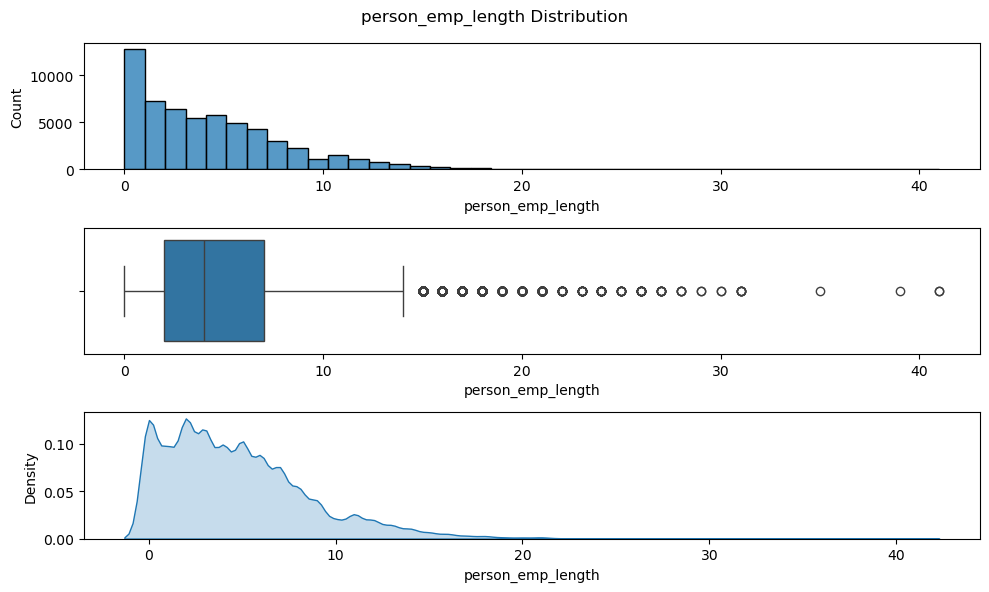

In [46]:
num_plot('person_emp_length')

In [45]:
# We should remove this dirty outlier
df.drop(df.query('person_emp_length>110').index,inplace=True)

<Axes: ylabel='count'>

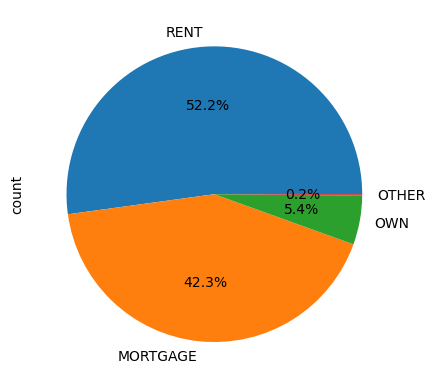

In [36]:
df['person_home_ownership'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: title={'center': 'Loan Grade Count Plot'}, xlabel='loan_grade'>

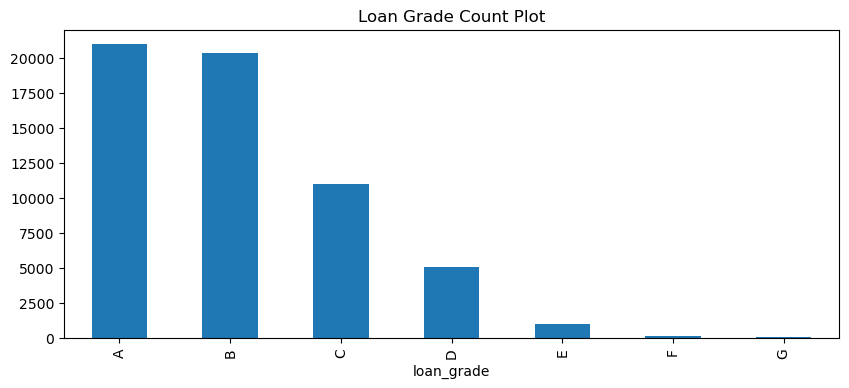

In [37]:
df['loan_grade'].value_counts().plot(kind='bar',figsize=(10,4),title="Loan Grade Count Plot")

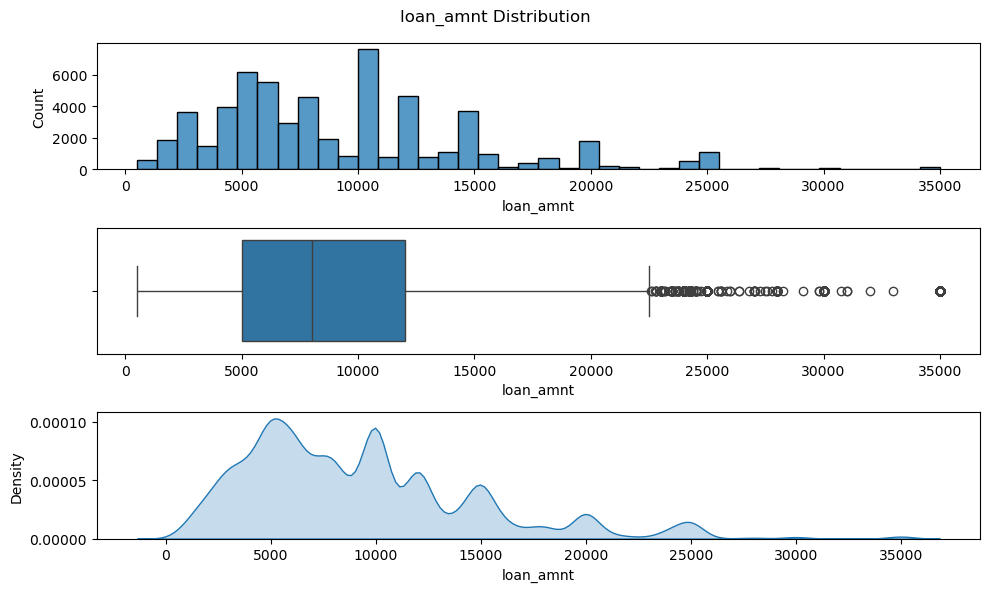

In [38]:
num_plot('loan_amnt')

<Axes: ylabel='count'>

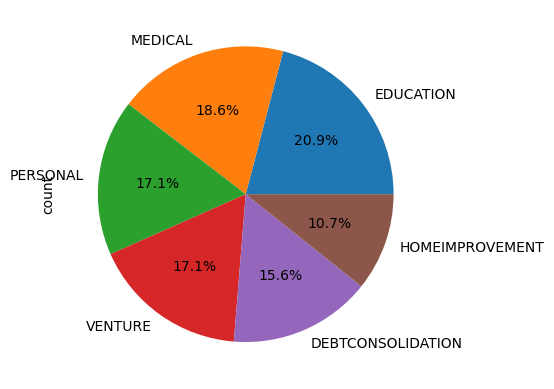

In [39]:
df['loan_intent'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='loan_intent'>

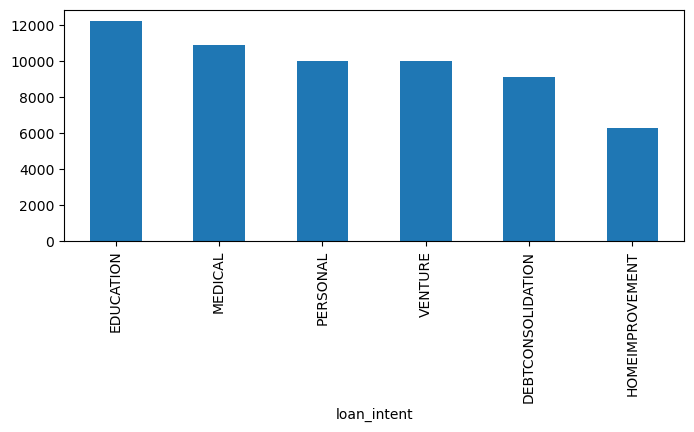

In [40]:
df['loan_intent'].value_counts().plot(kind='bar',figsize=(8,3))

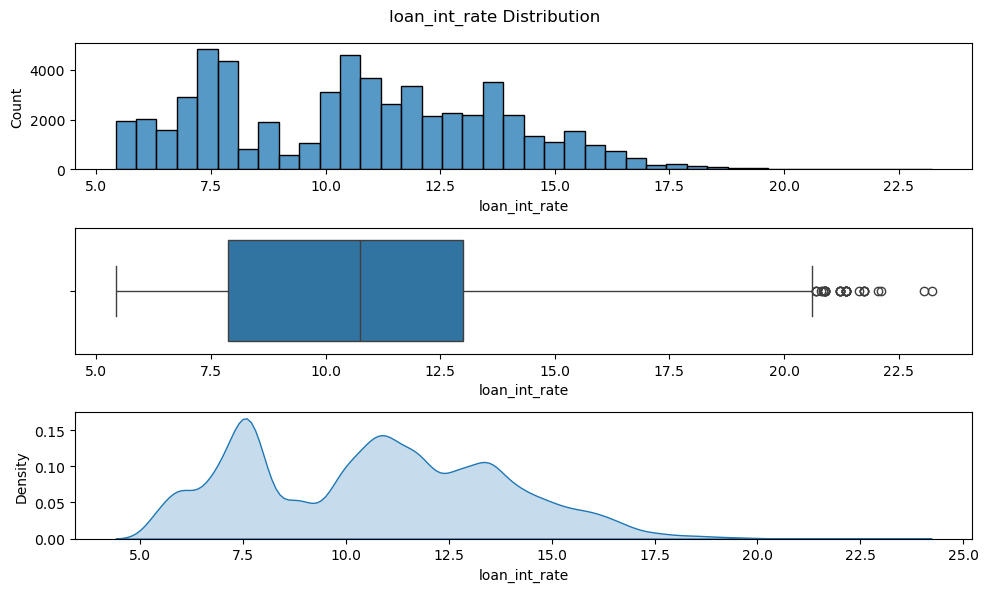

In [41]:
num_plot('loan_int_rate')

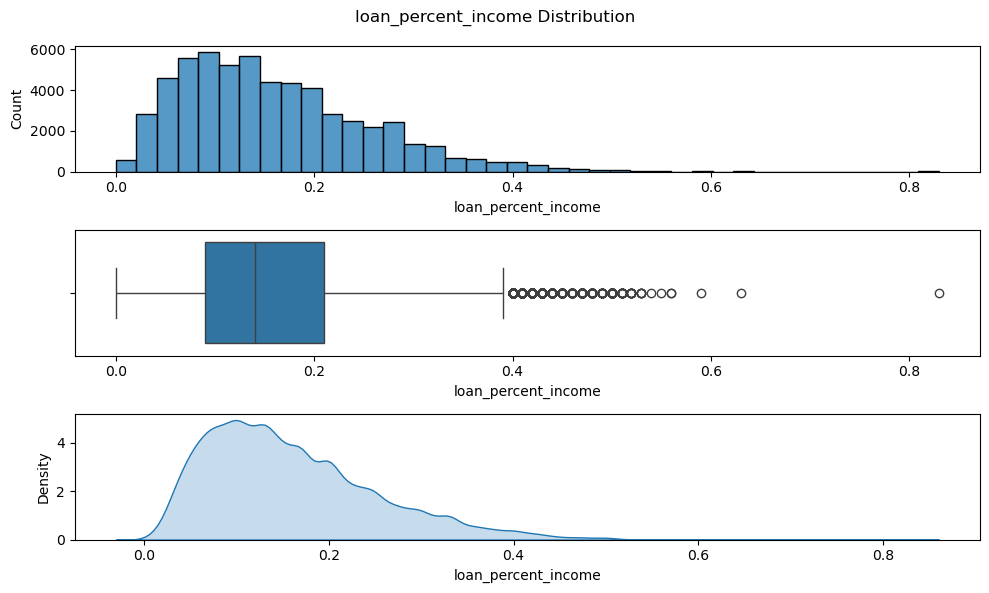

In [42]:
num_plot('loan_percent_income')

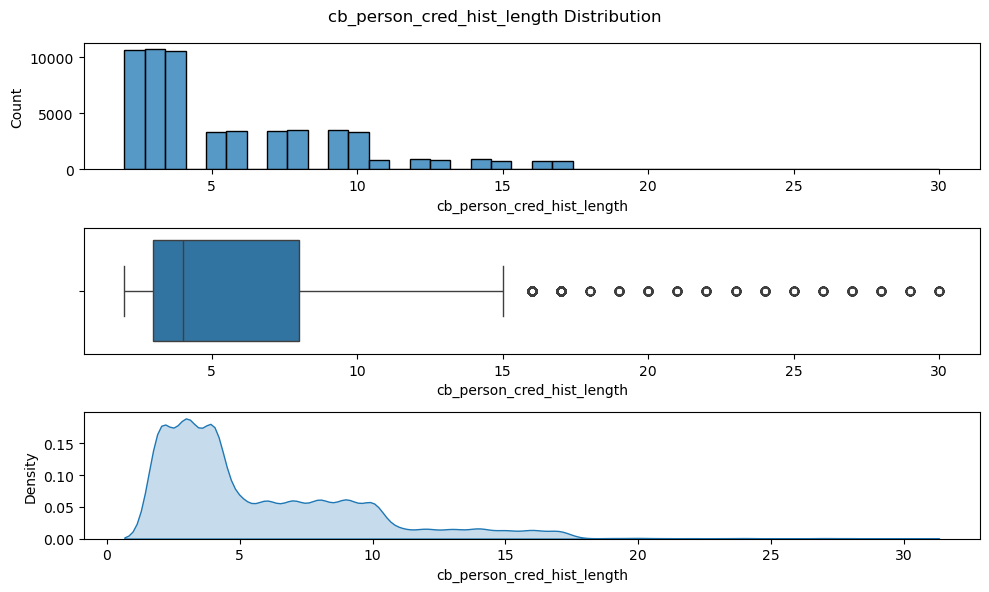

In [49]:
num_plot('cb_person_cred_hist_length')

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

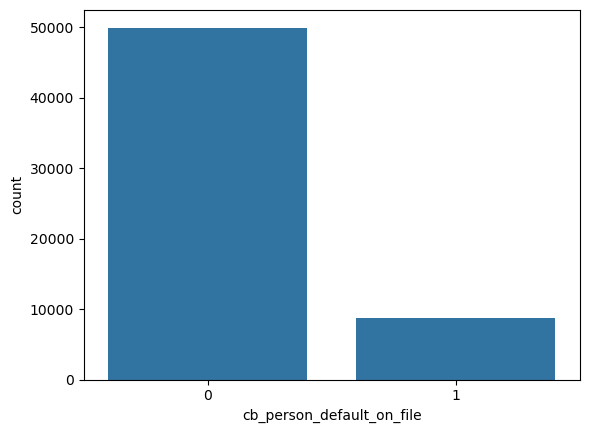

In [51]:
sns.countplot(x=df['cb_person_default_on_file'])

In [53]:
# Multivariate Analysis

<Axes: xlabel='loan_status', ylabel='person_age'>

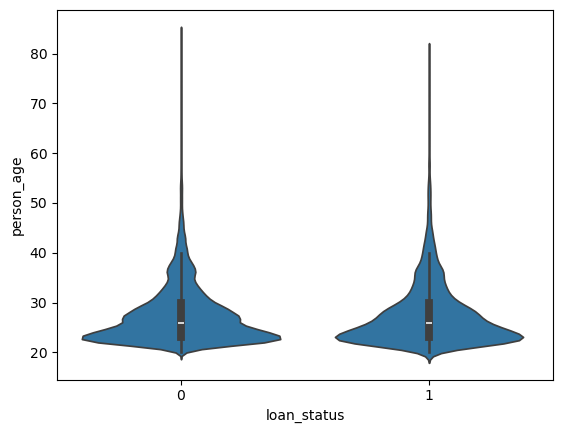

In [63]:
# Person age vs Loan Approval
sns.violinplot(y=df['person_age'],x=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='person_income'>

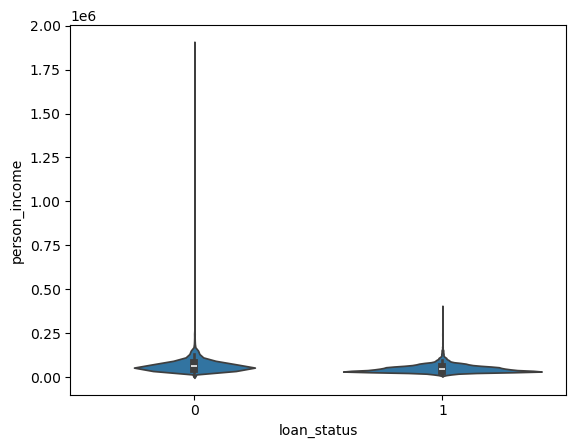

In [70]:
# Same for person income
sns.violinplot(y=df['person_income'],x=df['loan_status'])

In [74]:
pd.crosstab(df['loan_intent'],df['loan_status'],normalize='index')

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.810687,0.189313
EDUCATION,0.892266,0.107734
HOMEIMPROVEMENT,0.826274,0.173726
MEDICAL,0.821824,0.178176
PERSONAL,0.867199,0.132801
VENTURE,0.907193,0.092807


<Axes: xlabel='loan_status', ylabel='person_emp_length'>

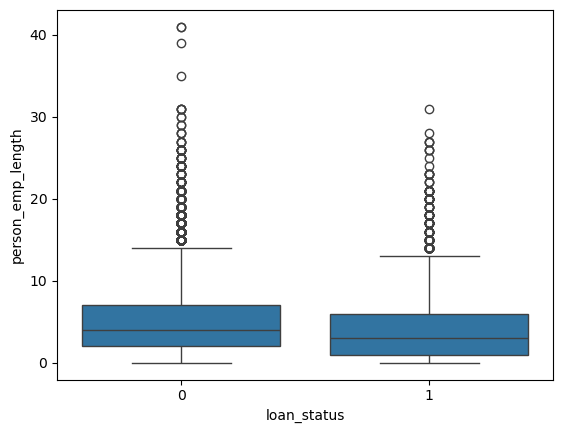

In [80]:
sns.boxplot(x=df['loan_status'],y=df['person_emp_length'])

In [83]:
pd.crosstab(df['person_home_ownership'],df['loan_status'])

loan_status,0,1
person_home_ownership,,
MORTGAGE,23339,1482
OTHER,74,15
OWN,3095,43
RENT,23785,6809


In [86]:
pd.crosstab(df['loan_grade'],df['loan_status'],normalize='index')

loan_status,0,1
loan_grade,,
A,0.950820,0.049180
B,0.897686,0.102314
C,0.864625,0.135375
D,0.406517,0.593483
E,0.374628,0.625372
F,0.389262,0.610738
G,0.181818,0.818182


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

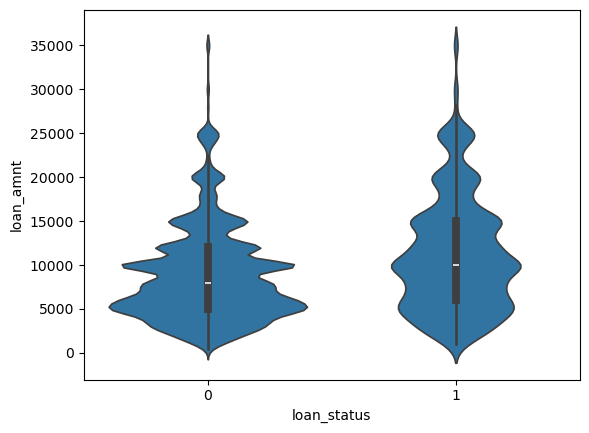

In [89]:
sns.violinplot(y=df['loan_amnt'],x=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

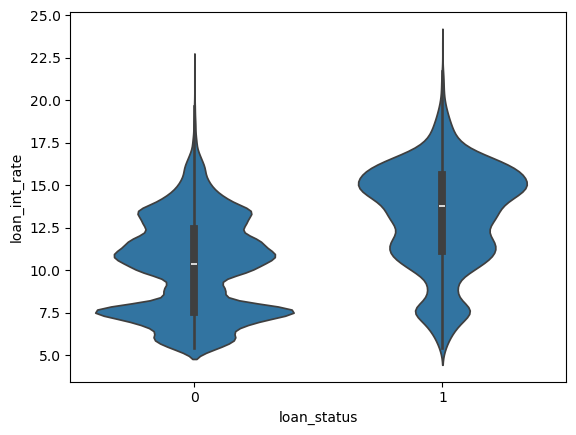

In [92]:
sns.violinplot(y=df['loan_int_rate'],x=df['loan_status'])


<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

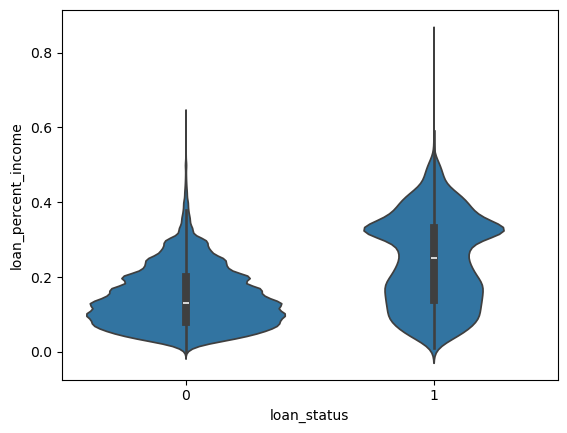

In [94]:
sns.violinplot(y=df['loan_percent_income'],x=df['loan_status'])

In [98]:
pd.crosstab(df['cb_person_default_on_file'],df['loan_status'],normalize='index')

loan_status,0,1
cb_person_default_on_file,,
0,0.884884,0.115116
1,0.701184,0.298816


<Axes: xlabel='loan_status', ylabel='cb_person_cred_hist_length'>

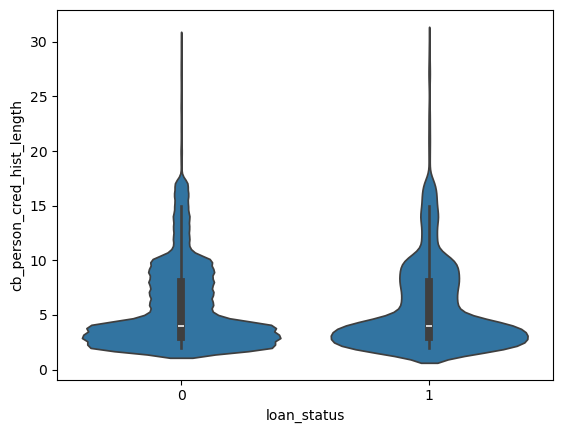

In [100]:
sns.violinplot(x=df['loan_status'],y=df['cb_person_cred_hist_length'])

In [101]:
# Model building